In [1]:
import pandas as pd
import matplotlib.pyplot as plt
Z = 1.96


In [2]:
path = "../../Risultati/Chlorine/rf_classification_mix_none_outliers.csv"
df = pd.read_csv(path)
df.reset_index(drop=True)
df['percentage'] = 100 - df['percentage']
df

,percentage,outlier,correction,imputation,r2
0,100,none,none,none,0.793202
1,100,none,none,none,0.782348
2,100,none,none,none,0.791774
3,100,none,none,none,0.784633
4,100,none,none,none,0.789203
...,...,...,...,...,...
480,50,lof,LOCF,interpolation,0.598400
481,50,hst,drop,LOCF,0.780944
482,50,hst,drop,interpolation,0.778718
483,50,hst,LOCF,LOCF,0.685233


In [3]:
df_neg = df[df['r2']<0]
df_neg

,percentage,outlier,correction,imputation,r2


In [4]:
df.loc[df['r2'] < 0, 'r2'] = 0

In [5]:
df

,percentage,outlier,correction,imputation,r2
0,100,none,none,none,0.793202
1,100,none,none,none,0.782348
2,100,none,none,none,0.791774
3,100,none,none,none,0.784633
4,100,none,none,none,0.789203
...,...,...,...,...,...
480,50,lof,LOCF,interpolation,0.598400
481,50,hst,drop,LOCF,0.780944
482,50,hst,drop,interpolation,0.778718
483,50,hst,LOCF,LOCF,0.685233


In [6]:
df_grouped = df.groupby(['outlier','correction','imputation']).mean().sort_values(by='r2', ascending=False)
print(df_grouped)

                                  percentage        r2
outlier correction imputation                         
none    none       none                100.0  0.788232
lof     drop       interpolation        70.0  0.777138
                   LOCF                 70.0  0.776166
hst     drop       interpolation        70.0  0.753517
                   LOCF                 70.0  0.752145
lof     LOCF       interpolation        70.0  0.661932
                   LOCF                 70.0  0.660411
hst     LOCF       interpolation        70.0  0.627442
                   LOCF                 70.0  0.627349
z       LOCF       interpolation        70.0  0.519423
                   LOCF                 70.0  0.518959
        drop       LOCF                 70.0  0.000000
                   interpolation        70.0  0.000000


In [7]:
df_none = df[(df['outlier'] == 'none') & (df['imputation']=='none')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_none['CI_Min'] = df_none['mean'] - Z * (df_none['std'] / (4 ** 0.5))
df_none['CI_Max'] = df_none['mean'] + Z * (df_none['std'] / (4 ** 0.5))
df_none

,percentage,mean,std,CI_Min,CI_Max
0,100,0.788232,0.00463,0.783694,0.79277


In [8]:
df_z_drop_locf = df[(df['outlier'] == 'z') & (df['correction']=='drop') & (df['imputation']=='LOCF')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_z_drop_locf['CI_Min'] = df_z_drop_locf['mean'] - Z * (df_z_drop_locf['std'] / (4 ** 0.5))
df_z_drop_locf['CI_Max'] = df_z_drop_locf['mean'] + Z * (df_z_drop_locf['std'] / (4 ** 0.5))
df_z_drop_locf

,percentage,mean,std,CI_Min,CI_Max
0,50,0.0,0.0,0.0,0.0
1,60,0.0,0.0,0.0,0.0
2,70,0.0,0.0,0.0,0.0
3,80,0.0,0.0,0.0,0.0
4,90,0.0,0.0,0.0,0.0


In [9]:
df_z_locf_locf = df[(df['outlier'] == 'z') & (df['correction']=='LOCF') & (df['imputation']=='LOCF')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_z_locf_locf['CI_Min'] = df_z_locf_locf['mean'] - Z * (df_z_locf_locf['std'] / (4 ** 0.5))
df_z_locf_locf['CI_Max'] = df_z_locf_locf['mean'] + Z * (df_z_locf_locf['std'] / (4 ** 0.5))
df_z_locf_locf

,percentage,mean,std,CI_Min,CI_Max
0,50,0.518745,0.002343,0.516449,0.521040
1,60,0.519102,0.002591,0.516563,0.521641
2,70,0.518316,0.002076,0.516281,0.520351
3,80,0.520423,0.001813,0.518646,0.522199
4,90,0.518209,0.002253,0.516001,0.520417


In [10]:
df_z_drop_int = df[(df['outlier'] == 'z') & (df['correction']=='drop') & (df['imputation']=='interpolation')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_z_drop_int['CI_Min'] = df_z_drop_int['mean'] - Z * (df_z_drop_int['std'] / (4 ** 0.5))
df_z_drop_int['CI_Max'] = df_z_drop_int['mean'] + Z * (df_z_drop_int['std'] / (4 ** 0.5))
df_z_drop_int

,percentage,mean,std,CI_Min,CI_Max
0,50,0.0,0.0,0.0,0.0
1,60,0.0,0.0,0.0,0.0
2,70,0.0,0.0,0.0,0.0
3,80,0.0,0.0,0.0,0.0
4,90,0.0,0.0,0.0,0.0


In [11]:
df_z_locf_int = df[(df['outlier'] == 'z') & (df['correction']=='LOCF') & (df['imputation']=='interpolation')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_z_locf_int['CI_Min'] = df_z_locf_int['mean'] - Z * (df_z_locf_int['std'] / (4 ** 0.5))
df_z_locf_int['CI_Max'] = df_z_locf_int['mean'] + Z * (df_z_locf_int['std'] / (4 ** 0.5))
df_z_locf_int

,percentage,mean,std,CI_Min,CI_Max
0,50,0.516781,0.003238,0.513608,0.519954
1,60,0.521815,0.002986,0.518889,0.524741
2,70,0.518638,0.003393,0.515313,0.521962
3,80,0.519887,0.002974,0.516973,0.522802
4,90,0.519994,0.004028,0.516047,0.523942


[]

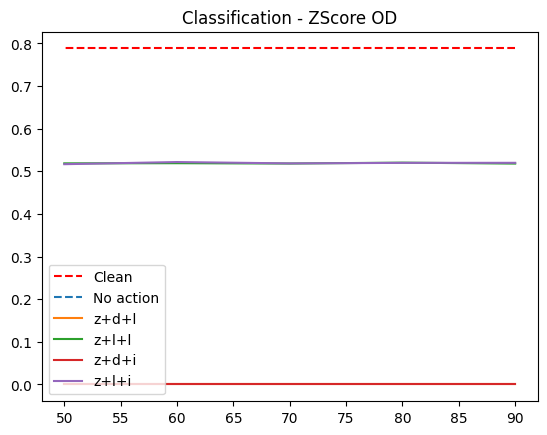

In [12]:
perc = [90,80,70,60,50]
plt.plot(perc, [df_none['mean'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_none['percentage'].iloc[:-1],df_none['mean'].iloc[:-1], '--', label='No action')
#plt.fill_between(df_none['percentage'].iloc[:-1],df_none['CI_Min'].iloc[:-1],df_none['CI_Max'].iloc[:-1],alpha=.05)
#plt.fill_between(df_lof_locf['percentage'],df_lof_locf['CI_Min'],df_lof_locf['CI_Max'],alpha=.05)
plt.plot(df_z_drop_locf['percentage'],df_z_drop_locf['mean'], label='z+d+l')
plt.plot(df_z_locf_locf['percentage'],df_z_locf_locf['mean'], label='z+l+l')
plt.plot(df_z_drop_int['percentage'],df_z_drop_int['mean'], label='z+d+i')
plt.plot(df_z_locf_int['percentage'],df_z_locf_int['mean'], label='z+l+i')
plt.title("Classification - ZScore OD")
plt.legend()
plt.plot()

In [13]:
df_lof_drop_locf = df[(df['outlier'] == 'lof') & (df['correction']=='drop') & (df['imputation']=='LOCF')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_lof_drop_locf['CI_Min'] = df_lof_drop_locf['mean'] - Z * (df_lof_drop_locf['std'] / (4 ** 0.5))
df_lof_drop_locf['CI_Max'] = df_lof_drop_locf['mean'] + Z * (df_lof_drop_locf['std'] / (4 ** 0.5))
df_lof_drop_locf

,percentage,mean,std,CI_Min,CI_Max
0,50,0.770659,0.008221,0.762602,0.778715
1,60,0.771896,0.004816,0.767177,0.776616
2,70,0.776015,0.006124,0.770014,0.782017
3,80,0.780778,0.004555,0.776314,0.785242
4,90,0.781481,0.003967,0.777593,0.785369


In [14]:
df_lof_locf_locf = df[(df['outlier'] == 'lof') & (df['correction']=='LOCF') & (df['imputation']=='LOCF')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_lof_locf_locf['CI_Min'] = df_lof_locf_locf['mean'] - Z * (df_lof_locf_locf['std'] / (4 ** 0.5))
df_lof_locf_locf['CI_Max'] = df_lof_locf_locf['mean'] + Z * (df_lof_locf_locf['std'] / (4 ** 0.5))
df_lof_locf_locf

,percentage,mean,std,CI_Min,CI_Max
0,50,0.591510,0.007507,0.584153,0.598866
1,60,0.629142,0.009651,0.619683,0.638600
2,70,0.661668,0.009240,0.652612,0.670724
3,80,0.693480,0.007881,0.685757,0.701204
4,90,0.726257,0.005564,0.720804,0.731709


In [15]:
df_lof_drop_int = df[(df['outlier'] == 'lof') & (df['correction']=='drop') & (df['imputation']=='interpolation')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_lof_drop_int['CI_Min'] = df_lof_drop_int['mean'] - Z * (df_lof_drop_int['std'] / (4 ** 0.5))
df_lof_drop_int['CI_Max'] = df_lof_drop_int['mean'] + Z * (df_lof_drop_int['std'] / (4 ** 0.5))
df_lof_drop_int

,percentage,mean,std,CI_Min,CI_Max
0,50,0.771313,0.006554,0.764890,0.777735
1,60,0.773572,0.003674,0.769971,0.777173
2,70,0.777236,0.006855,0.770518,0.783954
3,80,0.781722,0.004020,0.777782,0.785661
4,90,0.781847,0.003307,0.778606,0.785088


In [16]:
df_lof_locf_int = df[(df['outlier'] == 'lof') & (df['correction']=='LOCF') & (df['imputation']=='interpolation')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_lof_locf_int['CI_Min'] = df_lof_locf_int['mean'] - Z * (df_lof_locf_int['std'] / (4 ** 0.5))
df_lof_locf_int['CI_Max'] = df_lof_locf_int['mean'] + Z * (df_lof_locf_int['std'] / (4 ** 0.5))
df_lof_locf_int

,percentage,mean,std,CI_Min,CI_Max
0,50,0.598472,0.012847,0.585881,0.611062
1,60,0.630498,0.011080,0.619640,0.641357
2,70,0.661061,0.005047,0.656115,0.666008
3,80,0.693909,0.008273,0.685802,0.702016
4,90,0.725721,0.006010,0.719831,0.731611


[]

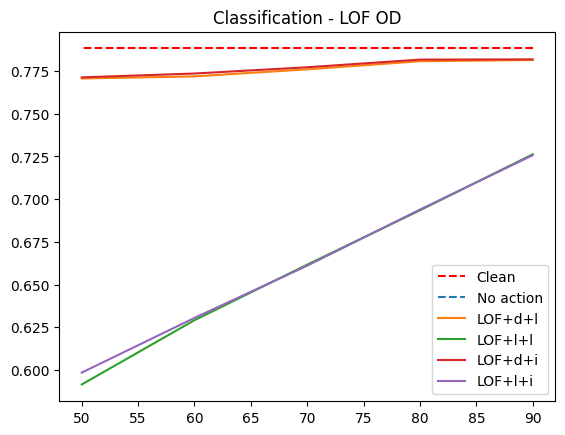

In [17]:
perc = [90,80,70,60,50]
plt.plot(perc, [df_none['mean'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_none['percentage'].iloc[:-1],df_none['mean'].iloc[:-1], '--', label='No action')
#plt.fill_between(df_none['percentage'].iloc[:-1],df_none['CI_Min'].iloc[:-1],df_none['CI_Max'].iloc[:-1],alpha=.05)
#plt.fill_between(df_lof_locf['percentage'],df_lof_locf['CI_Min'],df_lof_locf['CI_Max'],alpha=.05)
plt.plot(df_lof_drop_locf['percentage'],df_lof_drop_locf['mean'], label='LOF+d+l')
plt.plot(df_lof_locf_locf['percentage'],df_lof_locf_locf['mean'], label='LOF+l+l')
plt.plot(df_lof_drop_int['percentage'],df_lof_drop_int['mean'], label='LOF+d+i')
plt.plot(df_lof_locf_int['percentage'],df_lof_locf_int['mean'], label='LOF+l+i')
plt.title("Classification - LOF OD")
plt.legend()
plt.plot()

In [18]:
df_hst_drop_locf = df[(df['outlier'] == 'hst') & (df['correction']=='drop') & (df['imputation']=='LOCF')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_hst_drop_locf['CI_Min'] = df_hst_drop_locf['mean'] - Z * (df_hst_drop_locf['std'] / (4 ** 0.5))
df_hst_drop_locf['CI_Max'] = df_hst_drop_locf['mean'] + Z * (df_hst_drop_locf['std'] / (4 ** 0.5))
df_hst_drop_locf

,percentage,mean,std,CI_Min,CI_Max
0,50,0.775692,0.004794,0.770994,0.780390
1,60,0.777379,0.005326,0.772159,0.782598
2,70,0.774984,0.006503,0.768611,0.781356
3,80,0.768496,0.009375,0.759308,0.777684
4,90,0.664173,0.029305,0.635454,0.692893


In [19]:
df_hst_locf_locf = df[(df['outlier'] == 'hst') & (df['correction']=='LOCF') & (df['imputation']=='LOCF')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_hst_locf_locf['CI_Min'] = df_hst_locf_locf['mean'] - Z * (df_hst_locf_locf['std'] / (4 ** 0.5))
df_hst_locf_locf['CI_Max'] = df_hst_locf_locf['mean'] + Z * (df_hst_locf_locf['std'] / (4 ** 0.5))
df_hst_locf_locf

,percentage,mean,std,CI_Min,CI_Max
0,50,0.676878,0.017233,0.659990,0.693766
1,60,0.677342,0.012792,0.664806,0.689878
2,70,0.646565,0.015223,0.631646,0.661484
3,80,0.622001,0.017281,0.605065,0.638937
4,90,0.513960,0.019598,0.494754,0.533166


In [20]:
df_hst_drop_int = df[(df['outlier'] == 'hst') & (df['correction']=='drop') & (df['imputation']=='interpolation')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_hst_drop_int['CI_Min'] = df_hst_drop_int['mean'] - Z * (df_hst_drop_int['std'] / (4 ** 0.5))
df_hst_drop_int['CI_Max'] = df_hst_drop_int['mean'] + Z * (df_hst_drop_int['std'] / (4 ** 0.5))
df_hst_drop_int

,percentage,mean,std,CI_Min,CI_Max
0,50,0.776037,0.004918,0.771217,0.780857
1,60,0.776210,0.003956,0.772333,0.780086
2,70,0.774370,0.007890,0.766638,0.782102
3,80,0.767456,0.009213,0.758427,0.776485
4,90,0.673514,0.017901,0.655971,0.691057


In [21]:
df_hst_locf_int = df[(df['outlier'] == 'hst') & (df['correction']=='LOCF') & (df['imputation']=='interpolation')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_hst_locf_int['CI_Min'] = df_hst_locf_int['mean'] - Z * (df_hst_locf_int['std'] / (4 ** 0.5))
df_hst_locf_int['CI_Max'] = df_hst_locf_int['mean'] + Z * (df_hst_locf_int['std'] / (4 ** 0.5))
df_hst_locf_int

,percentage,mean,std,CI_Min,CI_Max
0,50,0.676378,0.016758,0.659956,0.692801
1,60,0.674414,0.015547,0.659178,0.689651
2,70,0.649029,0.014976,0.634352,0.663706
3,80,0.620608,0.015086,0.605825,0.635392
4,90,0.516781,0.020034,0.497147,0.536415


[]

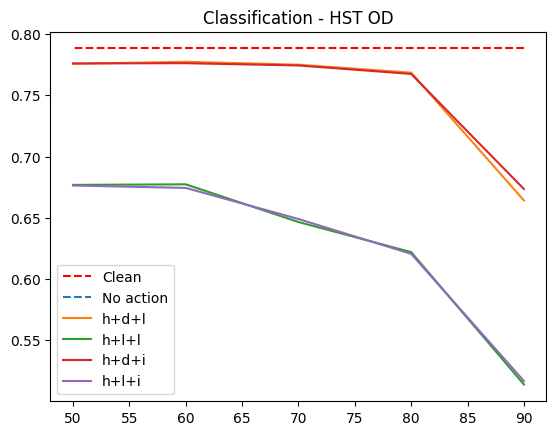

In [22]:
perc = [90,80,70,60,50]
plt.plot(perc, [df_none['mean'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_none['percentage'].iloc[:-1],df_none['mean'].iloc[:-1], '--', label='No action')
#plt.fill_between(df_none['percentage'].iloc[:-1],df_none['CI_Min'].iloc[:-1],df_none['CI_Max'].iloc[:-1],alpha=.05)
#plt.fill_between(df_lof_locf['percentage'],df_lof_locf['CI_Min'],df_lof_locf['CI_Max'],alpha=.05)
plt.plot(df_hst_drop_locf['percentage'],df_hst_drop_locf['mean'], label='h+d+l')
plt.plot(df_hst_locf_locf['percentage'],df_hst_locf_locf['mean'], label='h+l+l')
plt.plot(df_hst_drop_int['percentage'],df_hst_drop_int['mean'], label='h+d+i')
plt.plot(df_hst_locf_int['percentage'],df_hst_locf_int['mean'], label='h+l+i')
plt.title("Classification - HST OD")
plt.legend()
plt.plot()